In [169]:
import numpy as np
import pandas as pd

np.set_printoptions(precision = 3, suppress = True)

import tensorflow as tf
from tensorflow.keras import layers

In [170]:
# loading csv data
df = pd.read_csv("/Users/olivia.wilcox13/Documents/PQHS 416/pqhs416_dataset.csv")

df = df.dropna()

In [171]:
y = df['DIAGNOSIS'].values
y.shape

(78,)

In [172]:
x = df[['MICROSCOPY','IMAGING RESULTS','IMMUNOHISTOCHEMISTRY','BRAIN LOCALIZATION']].values
x.shape

(78, 4)

In [173]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#splitting into training and testing
(x_train, x_test, y_train, y_test) = train_test_split(x,y, test_size = 0.4)
x_train.shape

(46, 4)

In [174]:
#making training dataframe
df1 =pd.DataFrame(x_train)
df1=df1.rename(columns={0:'microscopy', 1:'imaging results', 2:'immunohistochemistry', 3:'brain localization'})
df2 = pd.DataFrame(y_train)
df2 = df2.rename(columns = {0:'diagnosis'})
df_train = pd.concat([df2, df1], axis=1)
df_train.head()

,diagnosis,microscopy,imaging results,immunohistochemistry,brain localization
0,Focal Cortical Dysplasia Type Ib,Neuronal cell loss,Minor encephalocele,NFSMI32-negative,Temporal lobe
1,Focal Cortical Dysplasia TypeIIb,Dyslamination,Possible cortical dysplasia,MAP2-positive,Left occipital lobe
2,Dysembryoplastic neuroepithelial tumor WHO Gra...,Neuroepithelial tumor,Neuroglial tumor,MAP2-positive,Left mesial temporal region
3,Hippocampal sclerosis type I,No tumor inflammation,Hippocampal sclerosis,GFAP-positive,Amygdala
4,Focal Cortical Dysplasia TypeIIb,Neuronal dysmorphia,Right parietal and occipital lobe lesion,MAP2-positive,Right parietal lobe


In [175]:
#making testing dataframe
df3 = pd.DataFrame(x_test)
df3 = df3.rename(columns={0:'microscopy', 1:'imaging results', 2:'immunohistochemistry', 3:'brain localization'})
df4 = pd.DataFrame(y_test)
df4 = df4.rename(columns={0:'diagnosis'})
df_test=pd.concat([df4, df3], axis = 1)
df_test.head()

,diagnosis,microscopy,imaging results,immunohistochemistry,brain localization
0,Focal Cortical Dysplasia TypeIIb,Infarction,Left inferior frontal gyrus,NFSMI32-positive,Left inferior frontal gyrus
1,Oligodendroglial hyperplasia,No neuronal dysmorphia,Right frontal lobe,NFSMI32-negative,Right frontal lobe
2,Mild Malformation of Cortical Development Type II,No neuronal dysmorphia,Temporal lobe mass,MAP2-positive,Left temporal lobe
3,Ganglioglioma WHO grade I,Neuroeptihelial tumor,Right posterior temporal lesion,GFAP-positive,Right posterior temporal
4,Focal Cortical Dysplasia Type Ib,Dyslamination,Normal,MAP2-positive,Right frontal lobe


In [176]:
max_features = 1000
max_len = 200
vectorize_layer = tf.keras.layers.TextVectorization(
max_tokens = max_features, output_mode = 'int',
output_sequence_length=max_len)

In [177]:
# text vectorization for training data
# text vectorization for output (diagnosis)
text_vectorizer = layers.TextVectorization(output_mode="multi_hot", ngrams=3)
text_vectorizer.adapt(df_train['diagnosis'])
train_d = text_vectorizer(df_train['diagnosis'])

# text vectorization for microscopy
text_vectorizer = layers.TextVectorization(output_mode="multi_hot", ngrams=3)
text_vectorizer.adapt(df_train['microscopy'])
train_m = text_vectorizer(df_train['microscopy'])

# text vectorization for imaging results
text_vectorizer = layers.TextVectorization(output_mode="multi_hot", ngrams=3)
text_vectorizer.adapt(df_train['imaging results'])
train_i = text_vectorizer(df_train['imaging results'])


# text vectorization for immunohistochemistry
text_vectorizer = layers.TextVectorization(output_mode="multi_hot", ngrams=3)
text_vectorizer.adapt(df_train['immunohistochemistry'])
train_immuno = text_vectorizer(df_train['immunohistochemistry'])


# text vectorization for brain localization
text_vectorizer = layers.TextVectorization(output_mode="multi_hot", ngrams=3)
text_vectorizer.adapt(df_train['brain localization'])
train_bl = text_vectorizer(df_train['brain localization'])


# combining text vectorizations into one training 
x_train = tf.concat([train_m, train_i, train_immuno, train_bl], axis = 1)
print (x_train.shape)

(46, 457)


In [178]:
print(train_d.shape)

(46, 60)


In [179]:
# text vectorization for testing data
# text vectorization for output(diagnosis)
text_vectorizer = layers.TextVectorization(output_mode="multi_hot", ngrams=3)
text_vectorizer.adapt(df_test['diagnosis'])
test_d = text_vectorizer(df_test['diagnosis'])

# text vectorization for microscopy
text_vectorizer = layers.TextVectorization(output_mode="multi_hot", ngrams=3)
text_vectorizer.adapt(df_test['microscopy'])
test_m = text_vectorizer(df_test['microscopy'])

# text vectorization for imaging results
text_vectorizer = layers.TextVectorization(output_mode="multi_hot", ngrams=3)
text_vectorizer.adapt(df_test['imaging results'])
test_i = text_vectorizer(df_test['imaging results'])

# text vectorization for immunohistochemistry
text_vectorizer = layers.TextVectorization(output_mode="multi_hot", ngrams=3)
text_vectorizer.adapt(df_test['immunohistochemistry'])
test_immuno = text_vectorizer(df_test['immunohistochemistry'])

# text vectorization for brain localization
text_vectorizer = layers.TextVectorization(output_mode="multi_hot", ngrams=3)
text_vectorizer.adapt(df_test['brain localization'])
test_bl = text_vectorizer(df_test['brain localization'])

# combing text vectorizations into testing data
x_test = tf.concat([test_m, test_i, test_immuno, test_bl], axis = 1)
print (x_test.shape)

(32, 378)


In [180]:
print(test_d.shape)

(32, 60)


In [188]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = "relu"),
        layers.Dense(64, activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
    return model

In [189]:
k = 4
num_val_samples = len(x_train) //k # "//" is Floor division (rounds to nearest whole number)
num_epochs = 10
all_scores = []

In [190]:
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_d[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [x_train[:i * num_val_samples],
    x_train[(i + 1) * num_val_samples:]],
    axis = 0)
    
    partial_train_targets = np.concatenate(
    [train_d[:i * num_val_samples],
    train_d[(i + 1) * num_val_samples:]],
    axis = 0)
    
    model = build_model()
    
    model.fit(partial_train_data, partial_train_targets,
             epochs = num_epochs, batch_size = 16, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [196]:
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_d[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [x_train[:i * num_val_samples],
     x_train[(i + 1) * num_val_samples:]],
    axis = 0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets,
                       validation_data = (val_data, val_targets),
                       epochs = num_epochs, batch_size = 16, verbose = 0)
    
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [197]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

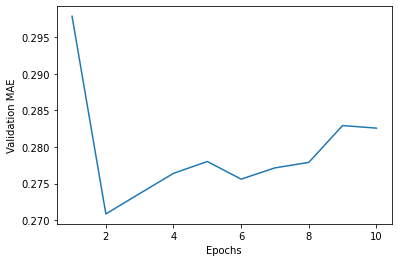

In [198]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()